In [255]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

a = pd.read_csv('train.csv')
a0 = a
a['Title'] = a.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
a = a.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
a['Title'] = a['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
a['Title'] = a['Title'].replace('Mlle', 'Miss')
a['Title'] = a['Title'].replace('Ms', 'Miss')
a['Title'] = a['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
a['Title'] = a['Title'].map(title_mapping)
a['Title'] = a['Title'].fillna(0)
    
a.head()
#a.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [256]:
a.loc[a.Sex == 'female', 'Sex'] = 0
a.loc[a.Sex == 'male', 'Sex'] = 1
a.Sex = a.Sex.astype('int64')
a.head()
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 59.2+ KB


In [257]:
a.loc[a.Embarked == 'C', 'Embarked'] = 0
a.loc[a.Embarked == 'Q', 'Embarked'] = 1
a.loc[a.Embarked == 'S', 'Embarked'] = 2
a.Embarked = a.Embarked.fillna(2)
a.Embarked = a.Embarked.astype('int64')

a.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,1


d:\temp\python\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
d:\temp\python\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
d:\temp\python\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
d:\temp\python\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
d:\temp\python\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
d:\temp\python\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\temp\python\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered

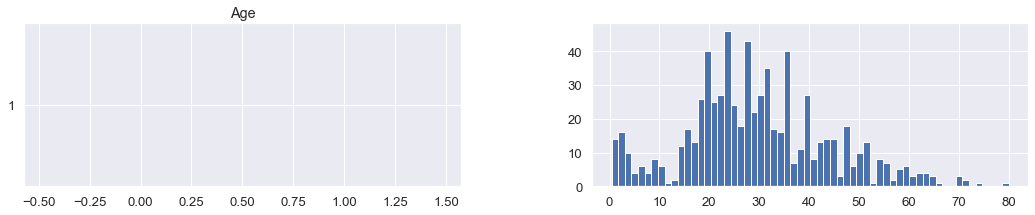

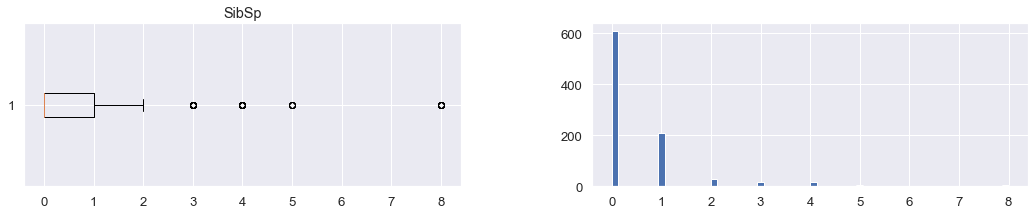

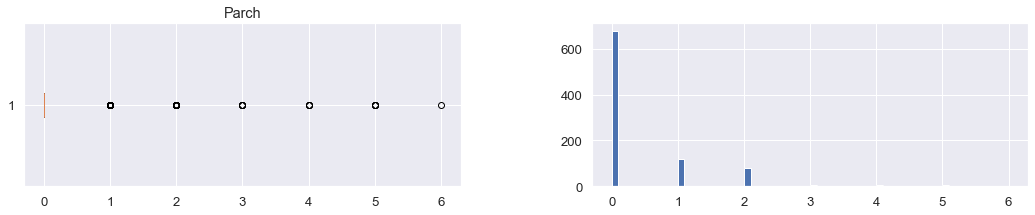

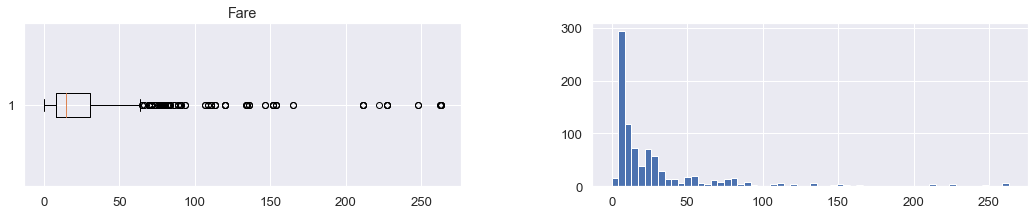

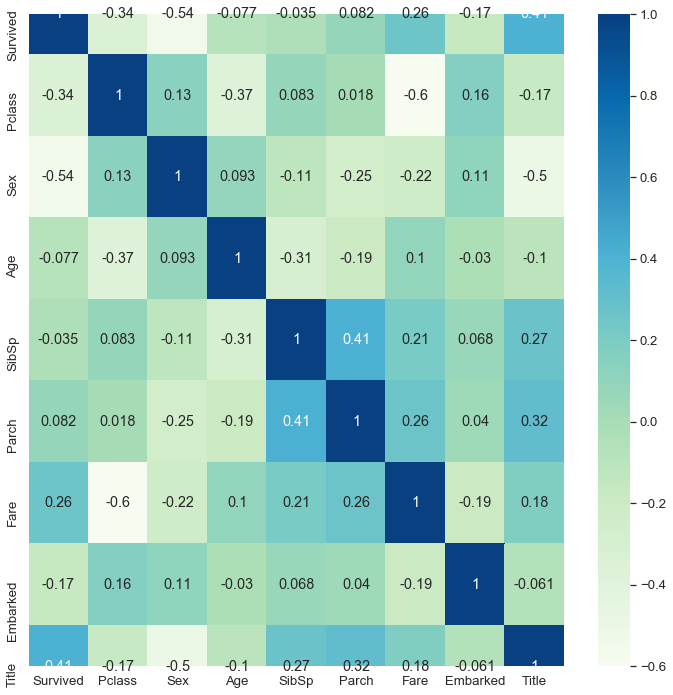

In [258]:
a.loc[a.Fare > 300, 'Fare'] = a.Fare.median()

def graphs(colm):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(18, 3)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    ax1, ax2 = ax.flatten()
    ax1.boxplot(a[colm], vert=False)
    ax1.set_title(colm)
    ax2.hist(a[colm], bins=60)
    plt.show()
    
graphs('Age')
graphs('SibSp')
graphs('Parch')
graphs('Fare')

plt.figure(figsize=(12,12))
sns.set(font_scale=1.2)
sns.heatmap(a.corr(),cmap='GnBu',annot=True)
plt.show()

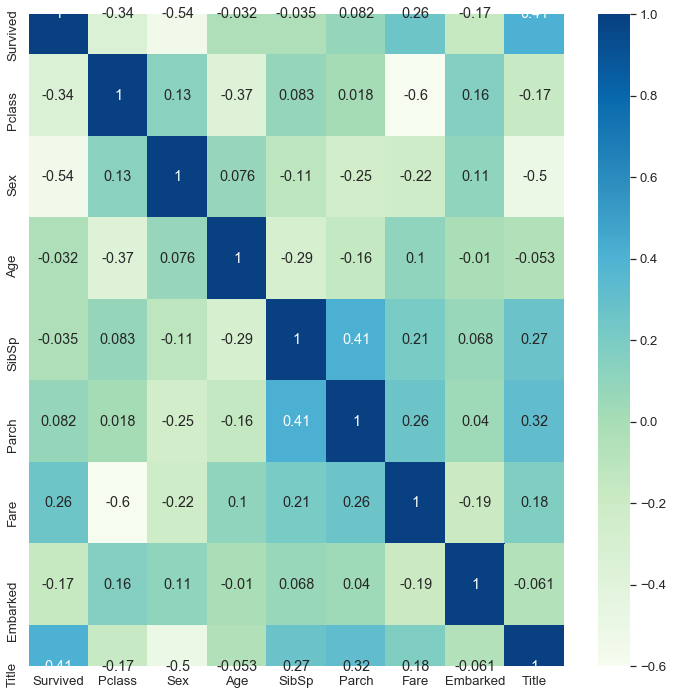

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(1), int64(8)
memory usage: 62.7 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,2,1
1,1,1,0,2,1,0,71.2833,0,3
2,1,3,0,1,0,0,7.9250,2,2
3,1,1,0,2,1,0,53.1000,2,3
4,0,3,1,2,0,0,8.0500,2,1


In [259]:
a.Age = a.Age.fillna(-1)
def age(colm):
    for i in range(len(a)):
        if a.at[i, colm] == -1:
            a.at[i, colm] = a.Age.median() - (a.at[i, 'SibSp']/a.SibSp.max()) * a.Age.median()

age('Age')

a.Age = a.Age.astype('int64')
c = a.Age

a.loc[ a['Age'] <= 16, 'Age'] = 0
a.loc[(a['Age'] > 16) & (a['Age'] <= 32), 'Age'] = 1
a.loc[(a['Age'] > 32) & (a['Age'] <= 48), 'Age'] = 2
a.loc[(a['Age'] > 48) & (a['Age'] <= 64), 'Age'] = 3
a.loc[ a['Age'] > 64, 'Age'] = 4

plt.figure(figsize=(12,12))
sns.set(font_scale=1.2)
sns.heatmap(a.corr(),cmap='GnBu',annot=True)
plt.show()

a.info()
a.head()

In [260]:
a.loc[ a['Fare'] <= 7.91, 'Fare'] = 0
a.loc[(a['Fare'] > 7.91) & (a['Fare'] <= 14.454), 'Fare'] = 1
a.loc[(a['Fare'] > 14.454) & (a['Fare'] <= 31), 'Fare']   = 2
a.loc[ a['Fare'] > 31, 'Fare'] = 3
a['Fare'] = a['Fare'].astype(int)

In [261]:
a[["Pclass", 'Age', 'Embarked', 'Title', 'Fare']] = a[["Pclass", 'Age', 'Embarked', 'Title', 'Fare']].astype("category")
a = pd.get_dummies(a)
a.head()

,Survived,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,...,Fare_2,Fare_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [262]:
y = pd.DataFrame(a['Survived'], columns=['Survived'])

a = a.drop('Survived', axis=1)

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(a, y, test_size=0.1, random_state=42)

lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

accuracy_score(y_valid, y_pred)

d:\temp\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8222222222222222

In [264]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.8252184769038702

In [265]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

# gb = GradientBoostingClassifier()
# gb.fit(X_train,y_train.values.ravel())
# y_pr = gb.predict(X_valid)
# accuracy_score(y_valid, y_pr)

clf = SVC(gamma="auto")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

d:\temp\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8333333333333334

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler



In [267]:
b = pd.read_csv('test.csv')
out = pd.DataFrame(b.PassengerId)
b['Title'] = b.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
b = b.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
b['Title'] = b['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
b['Title'] = b['Title'].replace('Mlle', 'Miss')
b['Title'] = b['Title'].replace('Ms', 'Miss')
b['Title'] = b['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
b['Title'] = b['Title'].map(title_mapping)
b['Title'] = b['Title'].fillna(0)
b.Fare = b.Fare.fillna(b.Fare.median())
b.loc[b.Fare > 300, 'Fare'] = b.Fare.median()
b.Age = b.Age.fillna(-1)
b.loc[b.Embarked == 'C', 'Embarked'] = 0
b.loc[b.Embarked == 'Q', 'Embarked'] = 1
b.loc[b.Embarked == 'S', 'Embarked'] = 2
b.Embarked = b.Embarked.fillna(2)
b.Embarked = b.Embarked.astype('int64')
b.loc[b.Sex == 'female', 'Sex'] = 0
b.loc[b.Sex == 'male', 'Sex'] = 1
b.Sex = b.Sex.astype('int64')

def age(colm):
    for i in range(len(b)):
        if b.at[i, colm] == -1:
            b.at[i, colm] = a0.Age.median() - (b.at[i, 'SibSp']/b.SibSp.max()) * a0.Age.median()

age('Age')

b.Age = b.Age.astype('int64')

b.loc[ b['Age'] <= 16, 'Age'] = 0
b.loc[(b['Age'] > 16) & (b['Age'] <= 32), 'Age'] = 1
b.loc[(b['Age'] > 32) & (b['Age'] <= 48), 'Age'] = 2
b.loc[(b['Age'] > 48) & (b['Age'] <= 64), 'Age'] = 3
b.loc[ b['Age'] > 64, 'Age'] = 4

b.loc[ b['Fare'] <= 7.91, 'Fare'] = 0
b.loc[(b['Fare'] > 7.91) & (b['Fare'] <= 14.454), 'Fare'] = 1
b.loc[(b['Fare'] > 14.454) & (b['Fare'] <= 31), 'Fare']   = 2
b.loc[ b['Fare'] > 31, 'Fare'] = 3
b['Fare'] = b['Fare'].astype(int)

b[["Pclass", 'Age', 'Embarked', 'Title', 'Fare']] = b[["Pclass", 'Age', 'Embarked', 'Title', 'Fare']].astype("category")
b = pd.get_dummies(b)

X_valid = b
# y_valid = lr.predict(X_valid)
# y_valid = gb.predict(X_valid)
y_valid = clf.predict(X_valid)

out['Survived'] = y_valid
out.to_csv('titanic.csv', index=False)
b.to_csv('out.csv', index=False)

b.describe()
# b.info()
# b.head()
# out.head()

,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Age_0,Age_1,Age_2,Age_3,...,Fare_2,Fare_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.636364,0.447368,0.392344,0.255981,0.222488,0.521531,0.083732,0.633971,0.188995,0.088517,...,0.248804,0.255981,0.244019,0.110048,0.645933,0.574163,0.188995,0.172249,0.050239,0.014354
std,0.481622,0.896760,0.981429,0.436934,0.416416,0.500135,0.277317,0.482295,0.391974,0.284385,...,0.432838,0.436934,0.430019,0.313324,0.478803,0.495062,0.391974,0.378049,0.218700,0.119088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
